In [1]:
## custom & third party
from utils import utils, vis
# from utils import poly_point_isect as bo   ##bentley-ottmann sweep line
import criteria as C


## third party
import networkx as nx

# from PIL import Image
from natsort import natsorted


## sys
import random
import time
from glob import glob
import math

## numeric
import numpy as np
import torch
from torch import nn, optim
import torch.nn.functional as F

## vis
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits import mplot3d
from matplotlib import collections  as mc
from mpl_toolkits.mplot3d.art3d import Line3DCollection

## notebook
from IPython import display
from IPython.display import clear_output
from tqdm.notebook import tqdm

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device = 'cpu'
plt.style.use('ggplot')
# plt.style.use('seaborn-colorblind')


In [46]:
# import importlib
# vis = importlib.reload(vis)

## read layouts

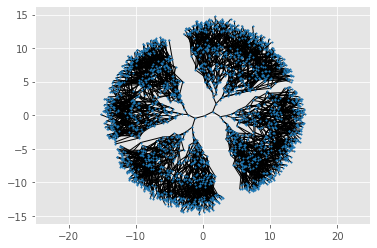

In [47]:
G = nx.read_gpickle('layouts/balanced_tree_2_10-stress-iter75811.gpickle')
pos = {i: G.nodes[i]['pos'] for i in G.nodes}
nx.draw_networkx(G, pos, node_size=2, with_labels=False)
plt.axis('equal')
plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)


## save runtime fig

In [127]:

from sklearn.linear_model import LinearRegression

In [154]:
import pylab as plot
params = {'legend.fontsize': 10,
          'legend.handlelength': 3}
plot.rcParams.update(params)

'stress' [0.55590534] 0.7533315882394516
'edge_uniformity' [0.83092572] -1.3129291719691745
'neighborhood_preseration' [0.54824844] 2.4987593697178454
'crossings' [0.6797066] 1.5907903820107059
'crossing_angle_maximization' [0.88489446] -0.2823420744704048
'aspect_ratio' [0.67961952] -0.9304577172767035
aaaa
'vertex_resolution' [0.89420913] -0.7254579808155128
'gabriel' [0.82398178] 0.13467499123879811


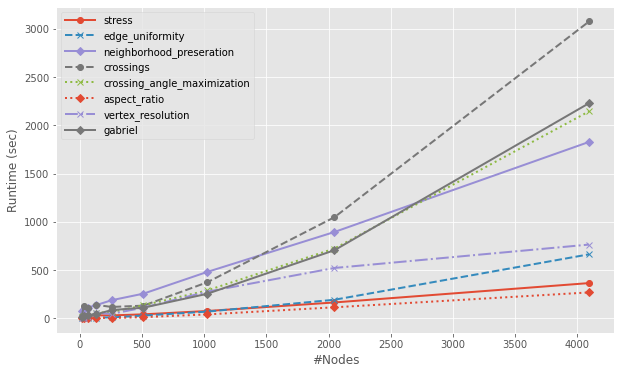

In [163]:
import pandas as pd

df = pd.read_csv(
    'runtime-balanced-tree.csv', 
#     'runtime-grid.csv', 
    names=['graph', 'criterion', 'nodeCount', 'iterCount', 'runtime'],
    comment='#'
)

fig = plt.figure(figsize=[10,6])
ax = fig.subplots()

lineStyles = ['-', '--', '-', '--',':',':','-.','-.'] * 5
markerStyles = ['o', 'x', 'D'] * 4
colorStyles = ['C0', 'C1', 'C2', 'C3', 'C5'] * 4
for ls, ms,cs, [criterionName, d] in zip(
    lineStyles, 
    markerStyles, 
    colorStyles,
    df.groupby('criterion', sort=False)
):
    criterionName = criterionName.strip()
    
    if criterionName == 'angular_resolution':
        print('aaaa')
        continue
    x = d.groupby('nodeCount')['nodeCount'].mean()
    y = d.groupby('nodeCount')['runtime'].mean()
    
    lr = LinearRegression().fit(
        np.log(x.to_numpy().reshape([-1,1])),
        np.log(y.to_numpy())
    )
    print(repr(criterionName), lr.coef_, lr.intercept_)
    
    
    plt.plot(x, y, lw=2, c=cs, linestyle=ls, marker=ms, label=criterionName)
    
plt.legend()
plt.xlabel('#Nodes')
plt.ylabel('Runtime (sec)')


# ax.set_xscale('log', basex=2)
# ax.set_yscale('log', basey=10)

# plt.xticks(2**np.arange(4,13))
# plt.yticks(10**np.arange(1,5))
# plt.title(f'Runtime on Balanced Trees')
# plt.savefig(f'runtime-balanced-tree.pdf', bbox_inches='tight')

# plt.xticks(2**np.arange(5,13))
# plt.yticks(10**np.arange(1,5))
# plt.title(f'Runtime on 2D Grids')
# plt.savefig(f'runtime-grid.pdf', bbox_inches='tight')

# ax.set_yscale('log', basey=2)
# plt.axis('equal')
plt.show()



-5.314245317563431

## Animation

In [ ]:
# from matplotlib.animation import FuncAnimation
# from IPython.display import HTML

# if type(xPath) == list:
#     xPath = np.stack(xPath)
    
# padding = 0.1

# fig, ax = plt.subplots()
# scatter = plt.scatter([0], [0], s=10)
# lc = mc.LineCollection([], linewidths=1)
# ax.add_collection(lc)

# xlim = [np.min(xPath[:,:,0]),np.max(xPath[:,:,0])]
# ylim = [np.min(xPath[:,:,1]),np.max(xPath[:,:,1])]
# xlim = [xlim[0]-padding*(xlim[1]-xlim[0]), xlim[1]+padding*(xlim[1]-xlim[0])]
# ylim = [ylim[0]-padding*(ylim[1]-ylim[0]), ylim[1]+padding*(ylim[1]-ylim[0])]
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
    
# def init():
#     return scatter,lc

# def update(frame):
#     xy = xPath[frame]
#     scatter.set_offsets(xy)
#     segs = [[xy[k2i[k0]], xy[k2i[k1]]] for k0,k1 in G.edges]           
#     lc.set_segments(segs)
#     return scatter,lc

# anim = FuncAnimation(
#     fig, 
#     update, 
#     frames=range(0,len(xPath),1),
#     init_func=init, 
#     interval=1000.0/20,
#     blit=True)

# HTML(anim.to_jshtml())

In [ ]:
# x = pos.detach().cpu().numpy()
# pos_i = {k: x[k2i[k], :2] for k in G.nodes}
# vis.plot(G, pos_i, lossHistory, [], i, totalTime, show=True, save=True)

## animation from image files

In [ ]:
# # Create a gif from images in fig/
# # 
# frames = []
# imgs = natsorted(glob('fig/*.png'))

# for img in imgs:
#     new_frame = Image.open(img)
#     frames.append(new_frame)

# # Save into a GIF file that loops forever
# frames[0].save(f'anim-{int(time.time())}.gif', format='GIF',
#                append_images=frames[1:],
#                save_all=True,
#                duration=100, loop=0)